In [44]:
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn

# Groupment
from sklearn.cluster import KMeans, DBSCAN

# Performance metrics
from sklearn.metrics import adjusted_rand_score, silhouette_score


In [45]:
data = pd.read_csv('mall.csv', sep=',')

In [46]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
data.shape

(200, 5)

In [48]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [50]:
data['Annual Income (k$)'].median()

np.float64(61.5)

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

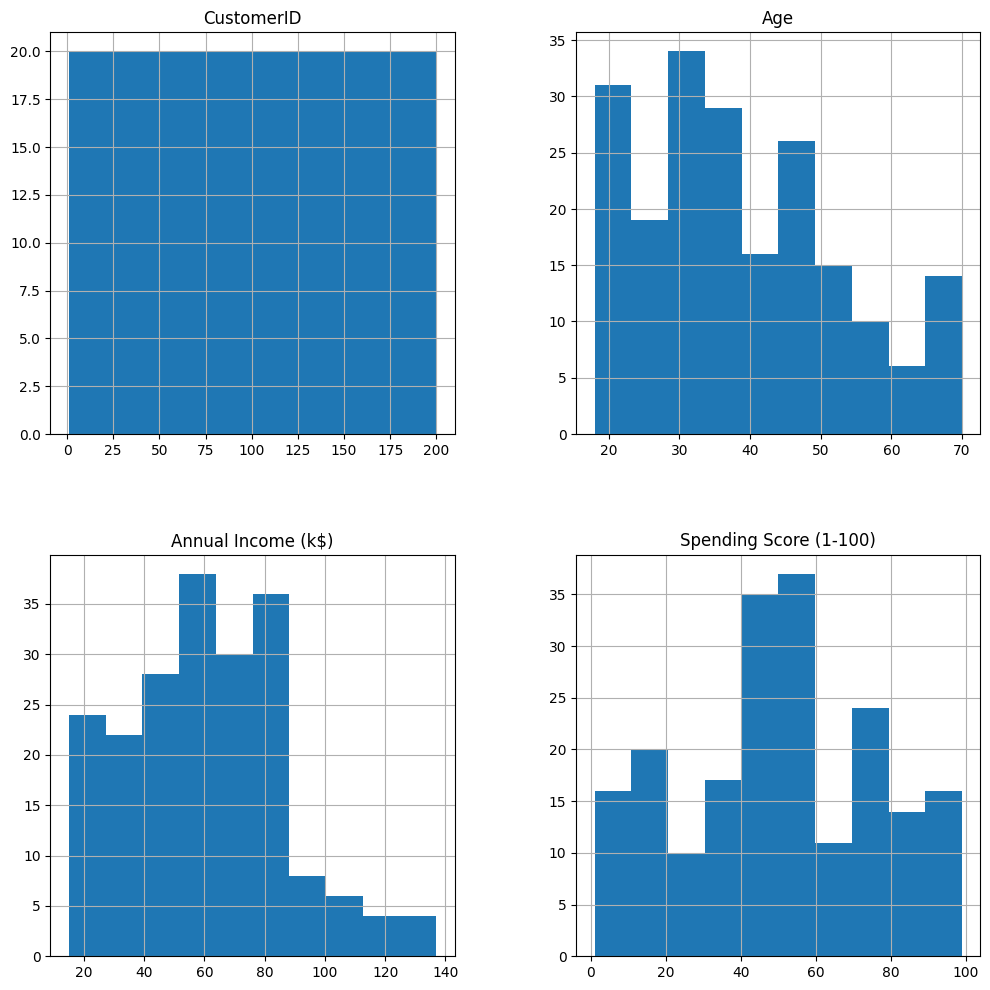

In [51]:
data.hist(figsize=(12, 12))

<Axes: >

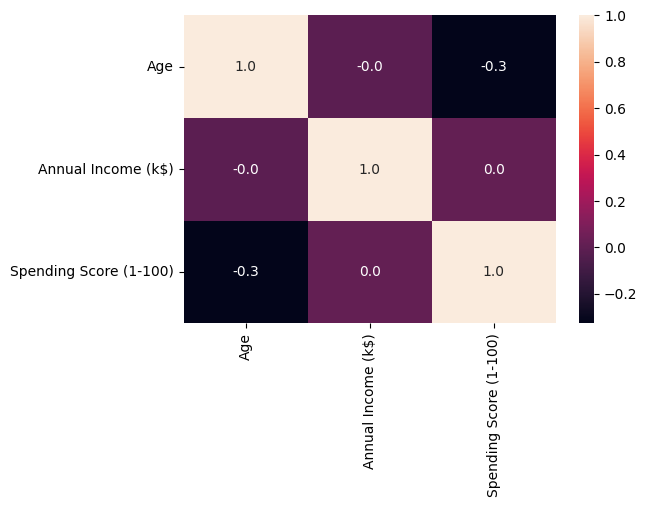

In [52]:
plt.figure(figsize=(6, 4))
seaborn.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(method='pearson'), annot=True, fmt='.1f')

In [53]:
data['Gender'].value_counts()

Gender
Female    112
Male       88
Name: count, dtype: int64

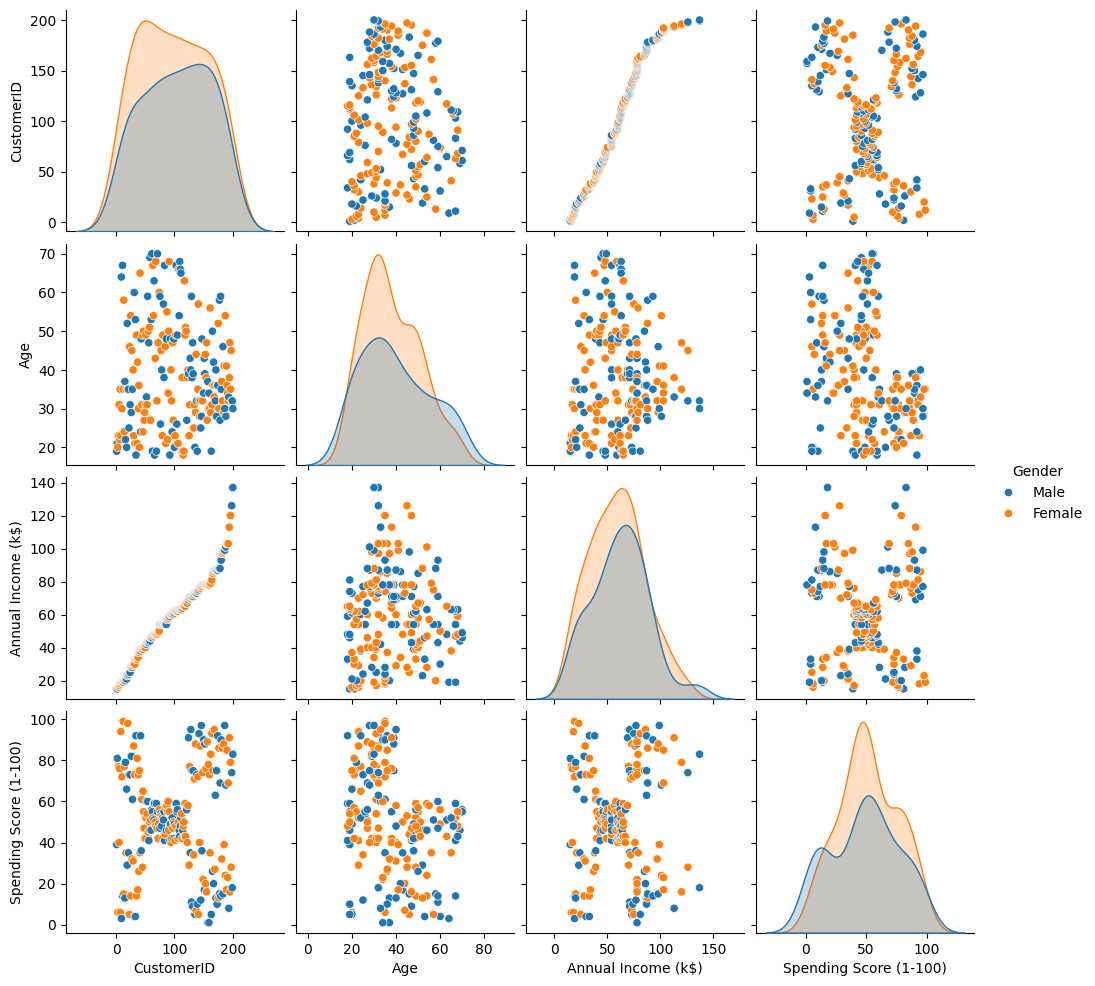

In [54]:
seaborn.pairplot(data, hue='Gender')
plt.show()

## Scaling

In [55]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [56]:
scaler = StandardScaler()
scaler.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

StandardScaler()

In [57]:
std_data = scaler.transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [58]:
std_data

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### With feature scaling

In [59]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

centroids = kmeans.cluster_centers_

kmean_labels = kmeans.predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

### Without feature scaling

In [60]:
kmeans = KMeans(n_clusters=6, random_state=0)

kmeans.fit(std_data)

std_centroids = kmeans.cluster_centers_

std_kmean_labels = kmeans.predict(std_data)

In [61]:
std_data = pd.DataFrame(std_data, columns=['Annual Income (k$)', 'Spending Score (1-100)'])
std_data.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [62]:
std_data['Cluster'] = std_kmean_labels
std_data.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,5
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,5
4,-1.662660,-0.395980,3


In [63]:
data['Cluster'] = kmean_labels
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,5
2,3,Female,20,16,6,3
3,4,Female,23,16,77,5
4,5,Female,31,17,40,3


In [64]:
pd.Series(kmean_labels).value_counts()

0    49
4    39
1    39
2    32
3    21
5    20
Name: count, dtype: int64

In [65]:
centroids

array([[62.73469388, 46.91836735],
       [86.53846154, 82.12820513],
       [89.40625   , 15.59375   ],
       [25.14285714, 19.52380952],
       [45.51282051, 51.51282051],
       [24.95      , 81.        ]])

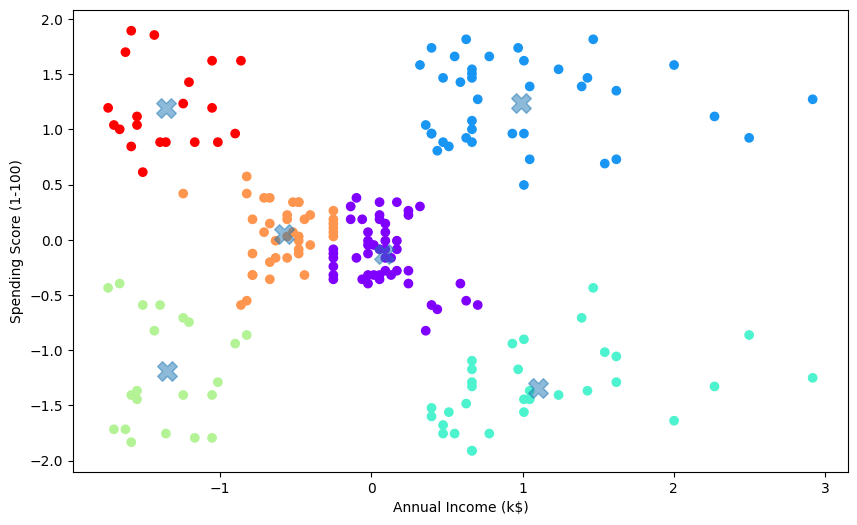

In [67]:
plt.scatter(std_data['Annual Income (k$)'], std_data['Spending Score (1-100)'], c=std_kmean_labels, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(std_centroids[:, 0], std_centroids[:, 1], marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

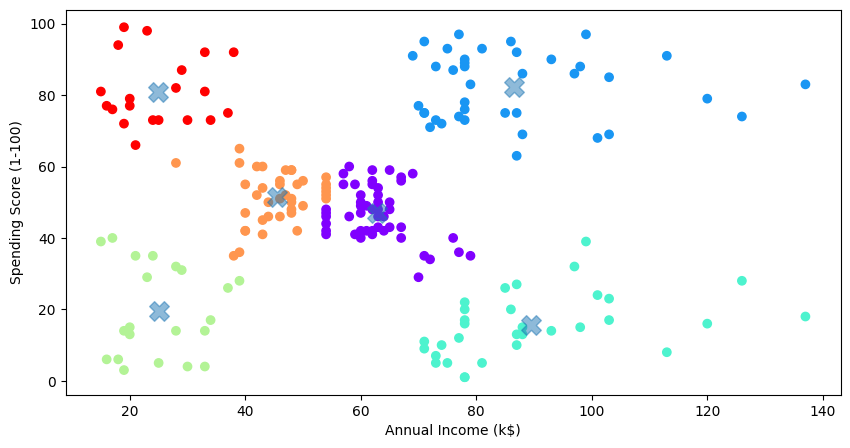

In [68]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=std_kmean_labels, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

## Finding optimal number of clusters

In [71]:
k = list(range(1, 10))
print(k)

[1, 2, 3, 4, 5, 6, 7, 8, 9]


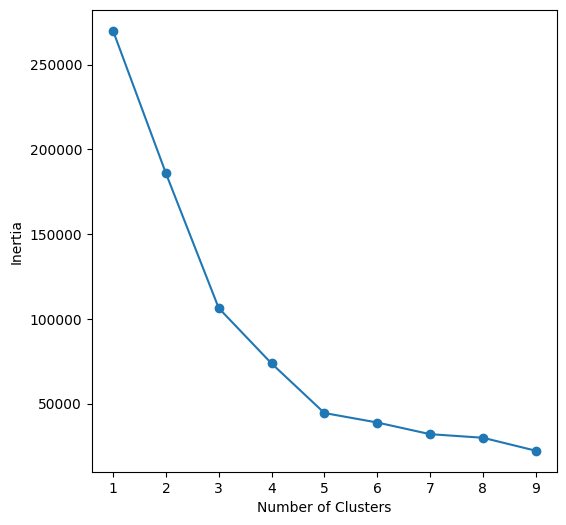

In [72]:
sse = [] # sum of squared errors

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_) # within cluster sum of squares
    
plt.rcParams['figure.figsize'] = (6, 6)
plt.plot(k, sse, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [73]:
data.groupby('Cluster')['Age'].mean()

Cluster
0    41.836735
1    32.692308
2    41.000000
3    44.142857
4    43.820513
5    24.850000
Name: Age, dtype: float64

In [74]:
data.groupby('Cluster')['Annual Income (k$)'].mean()

Cluster
0    62.734694
1    86.538462
2    89.406250
3    25.142857
4    45.512821
5    24.950000
Name: Annual Income (k$), dtype: float64

### With 5 clusters

In [76]:
kmeans = KMeans(n_clusters=5, random_state=0)

kmeans.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

centroids = kmeans.cluster_centers_

kmean_labels = kmeans.predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])

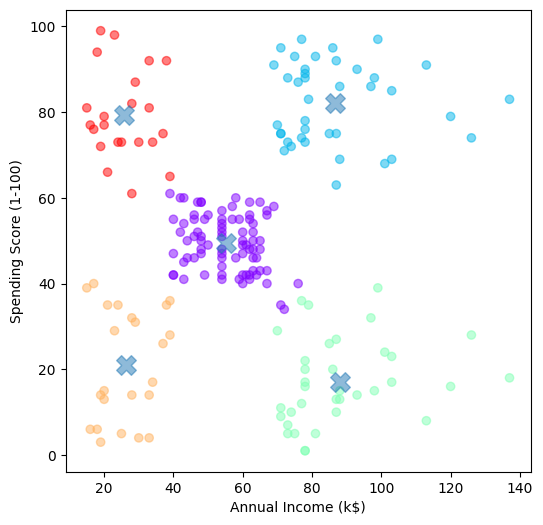

In [77]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=kmean_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (10, 5)
plt.show()

In [79]:
cluster1_data = data[data['Cluster'] == 0]
cluster1_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
74,75,Male,59,54,47,0
77,78,Male,40,54,48,0
79,80,Female,49,54,42,0
82,83,Male,67,54,41,0
83,84,Female,46,54,44,0
85,86,Male,48,54,46,0
86,87,Female,55,57,58,0
87,88,Female,22,57,55,0
88,89,Female,34,58,60,0
89,90,Female,50,58,46,0


In [81]:
cluster2_data = data[data['Cluster'] == 1]
cluster2_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
123,124,Male,39,69,91,1
125,126,Female,31,70,77,1
127,128,Male,40,71,95,1
129,130,Male,38,71,75,1
131,132,Male,39,71,75,1
133,134,Female,31,72,71,1
135,136,Female,29,73,88,1
137,138,Male,32,73,73,1
139,140,Female,35,74,72,1
141,142,Male,32,75,93,1


In [82]:
cluster3_data = data[data['Cluster'] == 2]
cluster3_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
128,129,Male,59,71,11,2
130,131,Male,47,71,9,2
134,135,Male,20,73,5,2
136,137,Female,44,73,7,2
138,139,Male,19,74,10,2
140,141,Female,57,75,5,2
144,145,Male,25,77,12,2
148,149,Female,34,78,22,2
150,151,Male,43,78,17,2
152,153,Female,44,78,20,2


In [83]:
cluster3_data['Age'].mean()

np.float64(41.0)

In [84]:
cluster4_data = data[data['Cluster'] == 3]
cluster4_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,3
2,3,Female,20,16,6,3
4,5,Female,31,17,40,3
6,7,Female,35,18,6,3
8,9,Male,64,19,3,3
10,11,Male,67,19,14,3
12,13,Female,58,20,15,3
14,15,Male,37,20,13,3
16,17,Female,35,21,35,3
18,19,Male,52,23,29,3


In [85]:
cluster5_data = data[data['Cluster'] == 4]
cluster5_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
27,28,Male,35,28,61,4
40,41,Female,65,38,35,4
42,43,Male,48,39,36,4
43,44,Female,31,39,61,4
45,46,Female,24,39,65,4
46,47,Female,50,40,55,4
47,48,Female,27,40,47,4
48,49,Female,29,40,42,4
49,50,Female,31,40,42,4
50,51,Female,49,42,52,4


# DBSCAN

In [88]:
dbscan = DBSCAN(eps=10, min_samples=8)

dbscan.fit(data[['Annual Income (k$)', 'Spending Score (1-100)']])

dbscan_labels = dbscan.labels_
dbscan_labels

array([-1,  0,  1,  0, -1,  0,  1, -1,  1,  0, -1, -1, -1,  0,  1,  0, -1,
        0, -1, -1, -1,  0,  1,  0,  1,  0, -1, -1,  2,  0,  1,  0,  1, -1,
       -1,  0, -1,  0,  2, -1,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  3,  2,  3,  2,  3,  4,  3,  4,  3,  2,  3,  4,  3,
        4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,
        3,  4,  3,  4,  3,  4,  3,  2,  3,  4,  3,  4,  3,  4,  3,  4, -1,
        4,  3,  4,  3,  4,  3,  4,  3,  4,  3, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

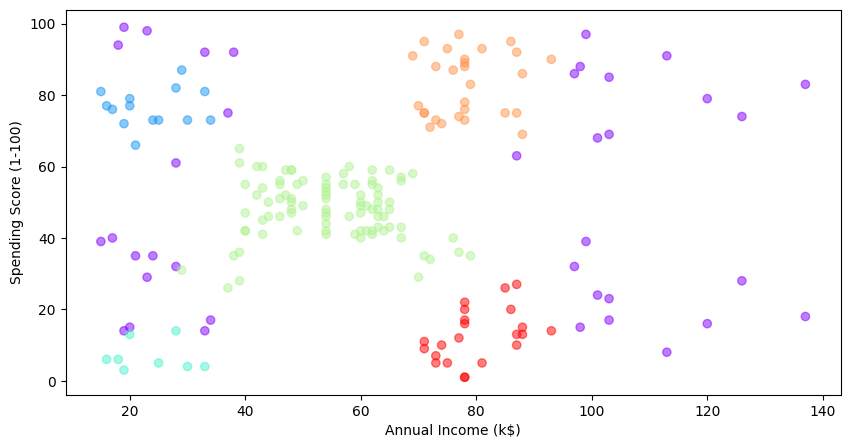

In [89]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [90]:
data.groupby('Cluster')['Age'].mean()

Cluster
0    41.836735
1    32.692308
2    41.000000
3    44.142857
4    43.820513
5    24.850000
Name: Age, dtype: float64

In [91]:
data.groupby('Cluster')['Annual Income (k$)'].mean()

Cluster
0    62.734694
1    86.538462
2    89.406250
3    25.142857
4    45.512821
5    24.950000
Name: Annual Income (k$), dtype: float64

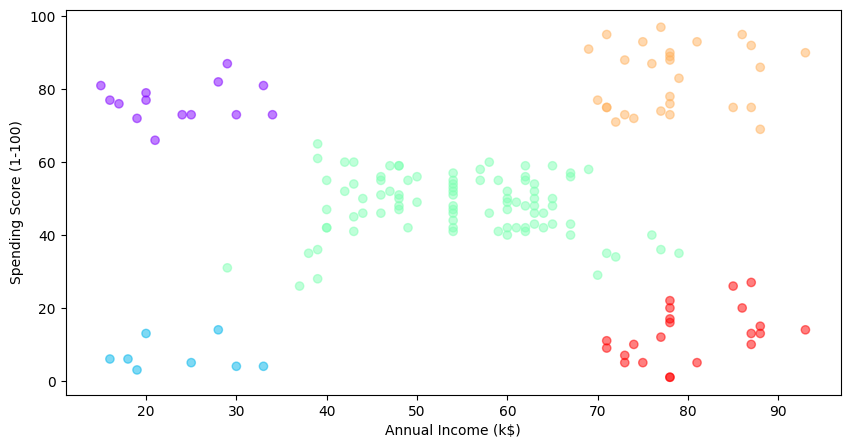

In [92]:
mask = dbscan_labels >= 0

plt.scatter(data[mask]['Annual Income (k$)'], data[mask]['Spending Score (1-100)'], c=dbscan_labels[mask], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [94]:
list(mask).count(False) # number of outliers

38

## Validating the algorithm performance

### External Type (Adjusted Rand Index)

In [95]:
adjusted_rand_score(kmean_labels, dbscan_labels)

0.7151933782093212

### Internal Type (Silhouette Coefficient)

In [99]:
# KMEANS
silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], kmean_labels) 

np.float64(0.553931997444648)

In [100]:
# DBSCAN
silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], dbscan_labels)

np.float64(0.36328873885121793)